In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['fast'])

# Создадим рандомные датасет 

<h5> Со значением theta равным:
\begin{equation} \theta_0= 4 \end{equation} 
\begin{equation} \theta_1= 3 \end{equation} 

Так же добавим Гауссовского шума в данные 

In [26]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

Визуализируем наши данные 

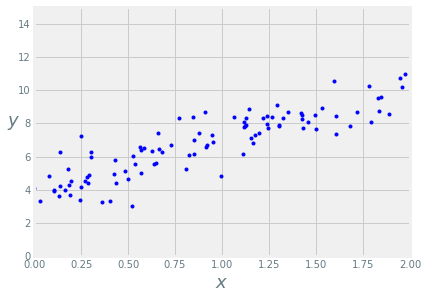

In [27]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

#  Аналитическое решение линейной регрессии

In [58]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.00053235]), array([[3.0687533]]))

<h5>Theta очень близко к нашим реальным значениям 4 и 3.

In [59]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.00053235],
       [10.13803895]])

<h5>Визуализируем предсказанные значения

Text(0, 0.5, '$y$')

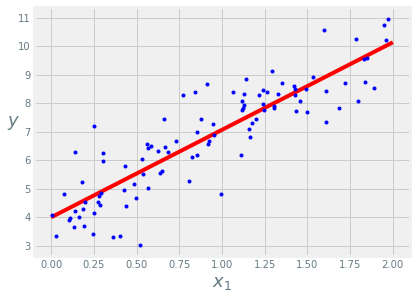

In [60]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

# Градиентный спуск

Уравнение для расчета функции стоимости и градиентов показано ниже. Обратите внимание, что функция стоимости предназначена для линейной регрессии. Для других алгоритмов функция стоимости будет другой, и градиенты должны быть получены из функций стоимости



<b>Функция потерь</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

<h5>Псевдокод алгоритма

### Градиентный спуск

```{python}
1.function gd(X, alpha, epsilon):
2.    initialise theta 
3.    do: 
4.        theta = new_theta
5.        new_theta = theta - alpha * grad(X, theta)
6.    until dist(new_theta, theta) < epsilon
7.    return theta
```

<h5>Визуализируем предсказанные значения

In [73]:
def  cal_cost(theta,X,y):
    ''' 
    Функция потерь
    '''   
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [74]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Марица X
    y    = Вектор Y
    theta = Вектор с theta np.random.randn(j,1)
    learning_rate - скорость обучения
    iterations = Количество итерация
    
    Возвращаем вектор theta, список с потерями, история с итерациями
    '''
    m = len(y) # Длинна выборки
    cost_history = np.zeros(iterations) # запись функции потерь после каждоый итерации
    theta_history = np.zeros((iterations,2)) # запись истории после каждоый итерации
    for it in range(iterations): # запускаем цикл для каждой итерации 
        
        prediction = np.dot(X,theta) # вычисляем градиент для theta
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y))) # делаем шаг в направлении антиградиента
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history


<h3> Начнем с 1000 итераций и скорости обучения 0,01, с theta из распределения Гаусса

In [75]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.054,
Theta1:          3.019
Final cost/MSE:  4149.371


<h3> Визуализируем историю из итераций

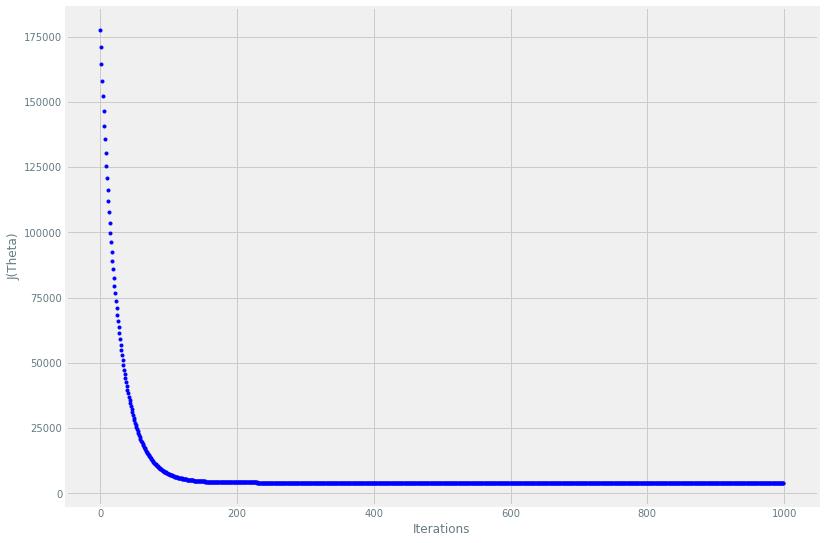

In [76]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

<h3> Примерно после 150 итераций потери остаются неизменными, поэтому оставшиеся итерации не нужны или не приведут к дальнейшей оптимизации

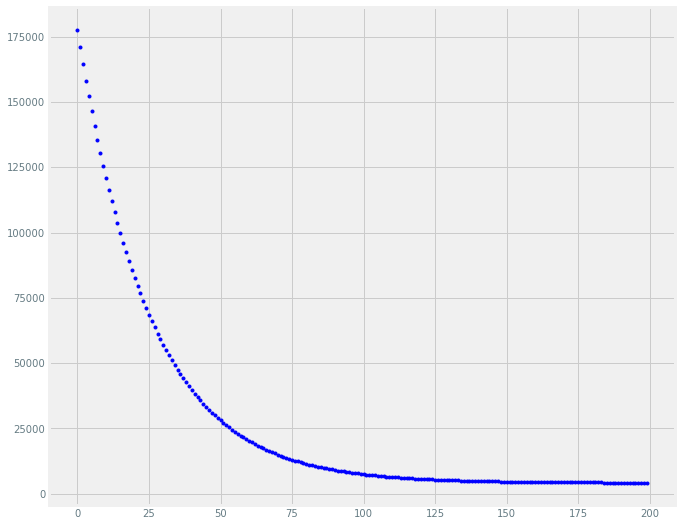

In [79]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

# Влияние learning rate

### Построим функицю для изображения влияния на функцию скорости обучения и количсетво итераций

In [84]:
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = количсетво итераций
     lr = скорость обучения
     ax = Ось для построения градиентного спуска
     ax1 = Ось для построения потерь и итераций

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr = 0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

### Графики для различных комбинаций итераций и скоростей обучения.

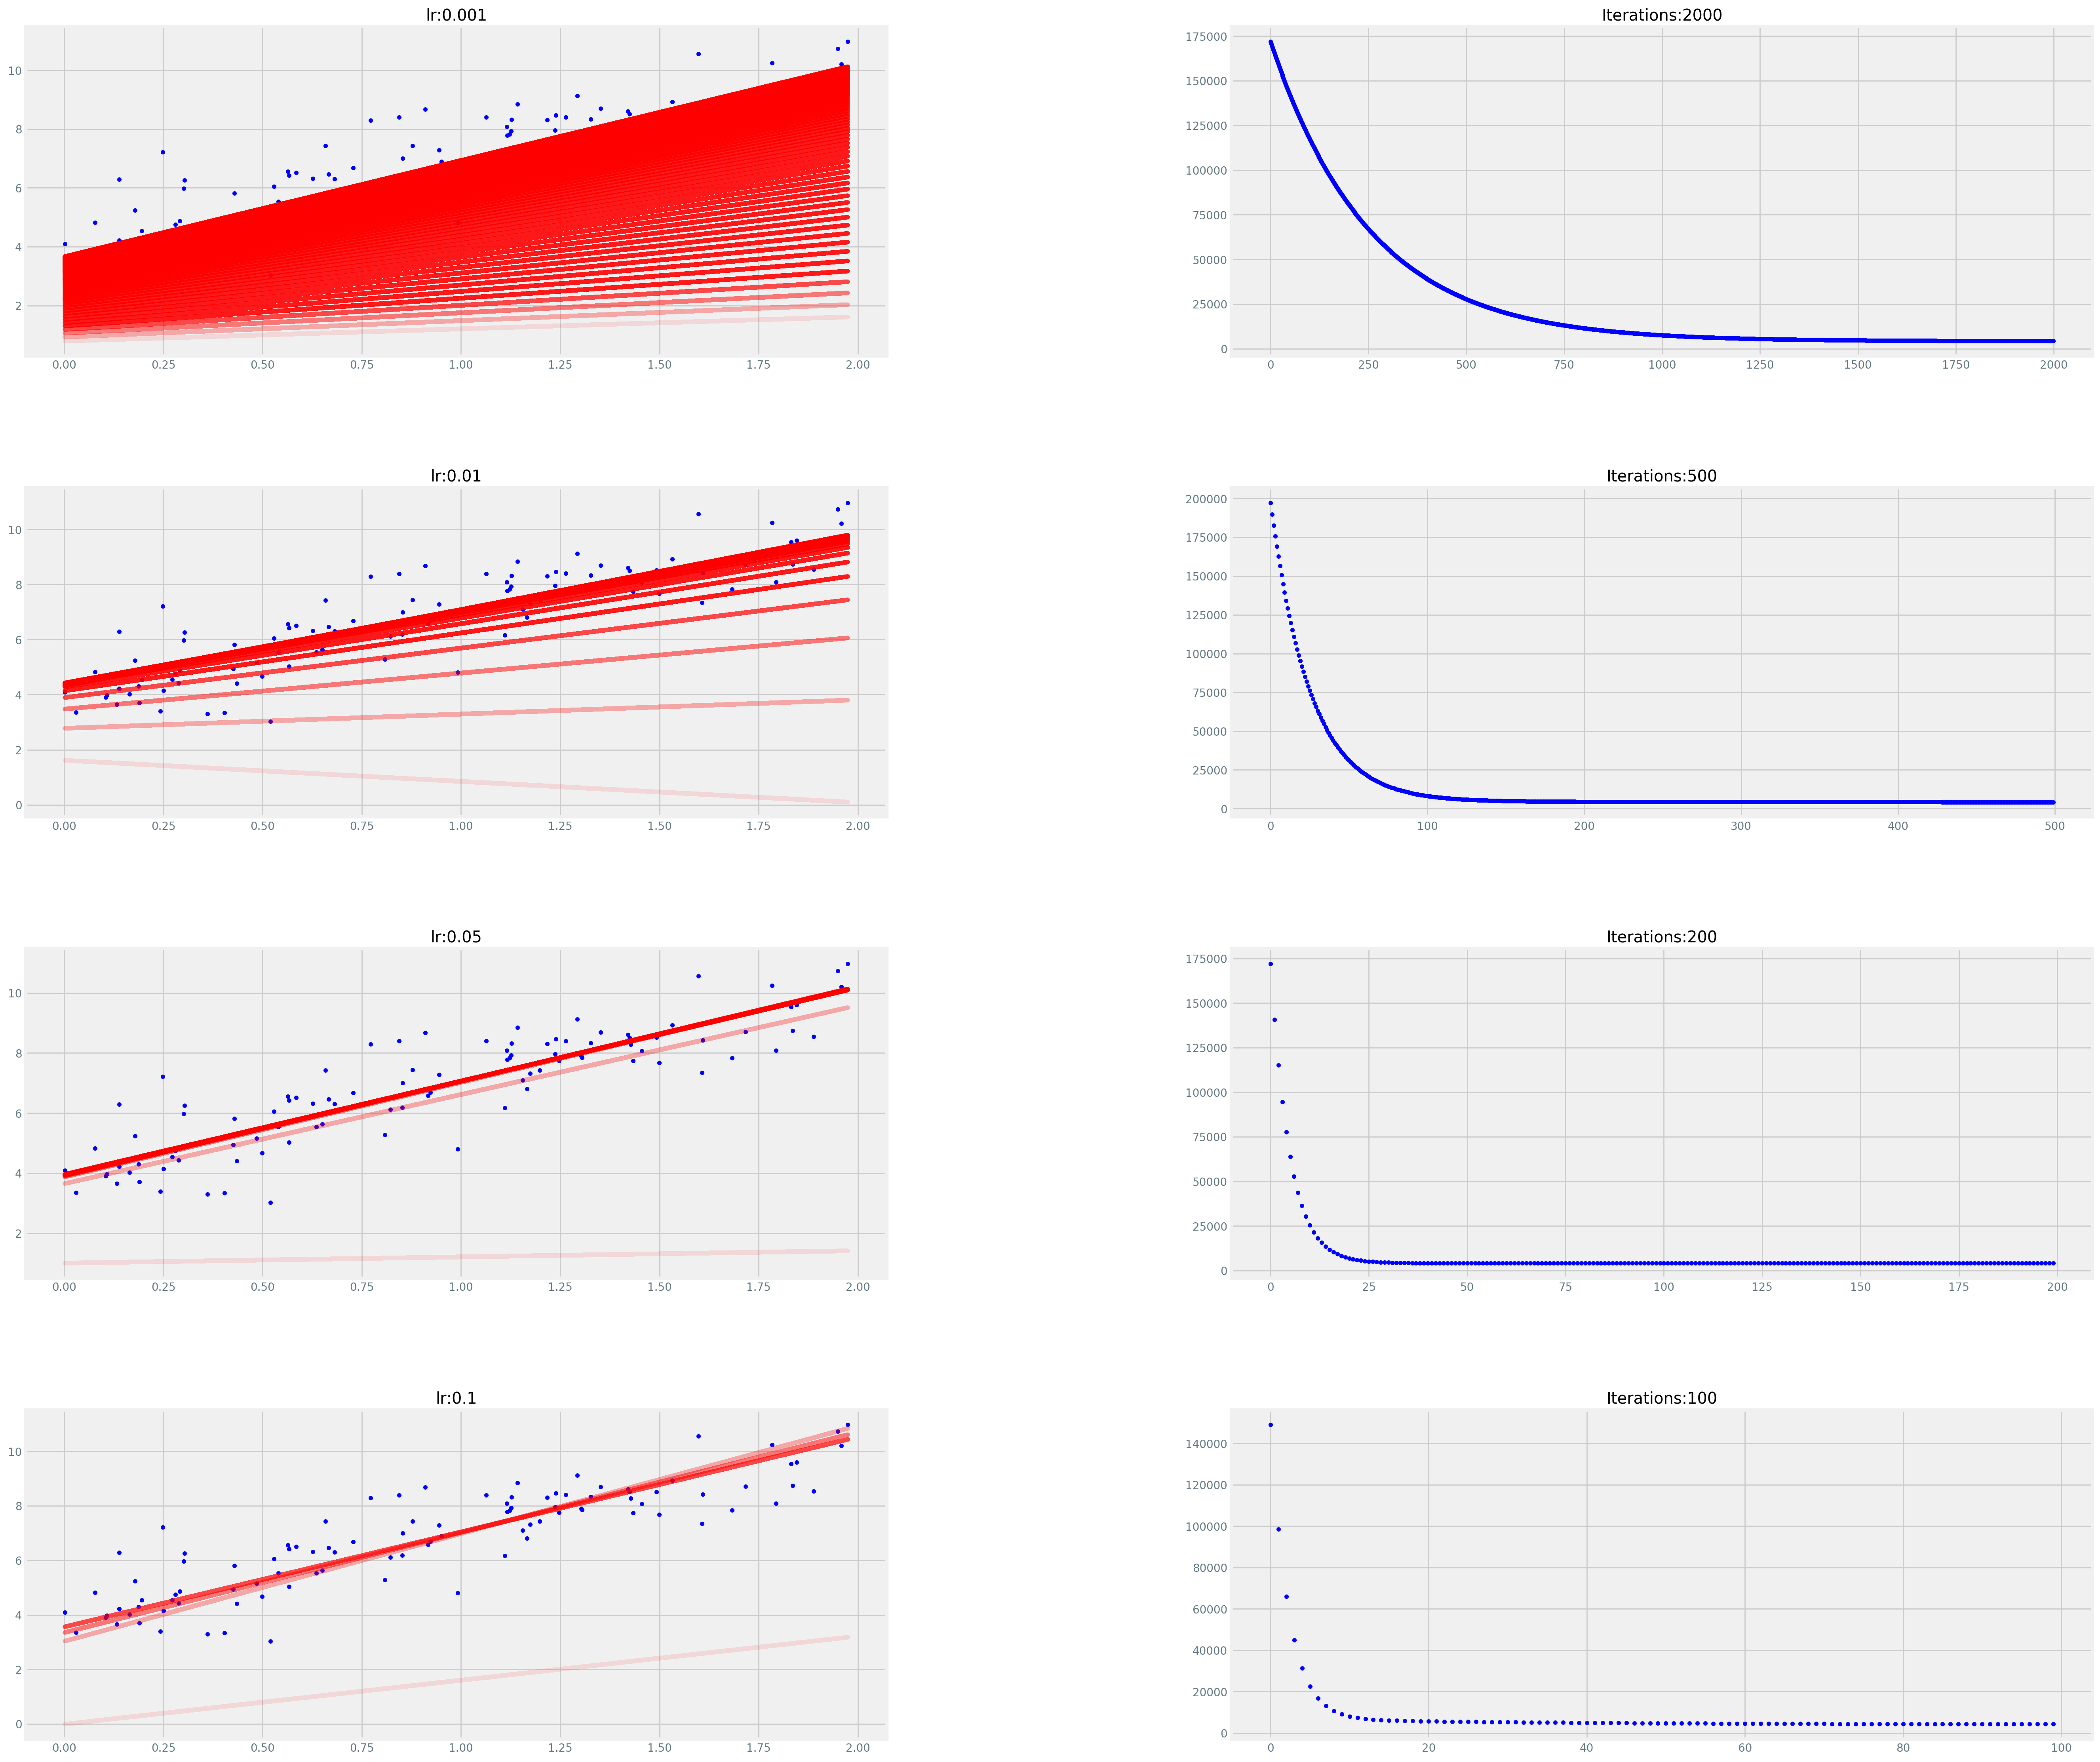

In [85]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)
    

<b> Бывает полезно визуализировать влияние скорости обучения и итераций на градиентный спуск. Красные линии показывают, как градиентный спуск начинается, а затем медленно приближается к конечному значению.

# Стохастический градиентный спуск

Stochastic gradient descent (SGD, стохастический
градиентный спуск): обновления происходят на каждом
обучающем примере.

Проблема - используется вся обучающая выборка на каждом шаге алгоритма
(очень дорого, иногда просто невозможно)

Решение - использовать один случайный элемент выборки

### Стохастический градиентный спуск

```{python}
1.function sgd(X, alpha, epsilon):
2. 	initialise theta 
3. 	do: 
4.        X = shuffle(X)
5.        for x in X:
6.            theta = new_theta
7.            new_theta = theta - alpha * grad(x, theta)
8.	until dist(new_theta, theta) < epsilon
9.	return theta
```

In [86]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X = Марица X
    y = Вектор Y
    theta = Вектор с theta np.random.randn(j,1)
    learning_rate - скорость обучения
    iterations = Количество итерация
    
    Возвращаем вектор theta, список с потерями, история с итерациями
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [87]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.005,
Theta1:          3.116
Final cost/MSE:  38.292


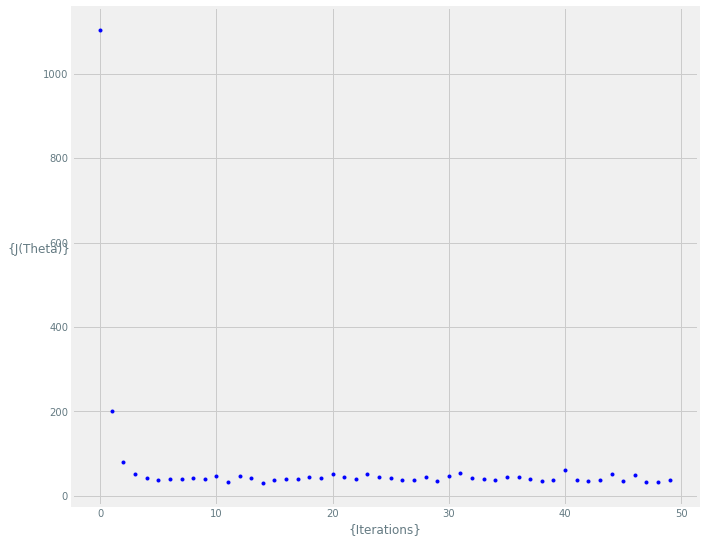

In [90]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

# Пакетный градиентный спуск  (Mini Batch Gradient Descent)

Mini-batch gradient descent (MB-GD, градиентный спуск с
мини-батчами): обновления происходят по некоторому числу
обучающих примеров. Промежуточный вариант между обычным
и стохастическим градиентным спуском.

In [91]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X - Марица X
    y - Вектор Y
    theta - Вектор с theta np.random.randn(j,1)
    learning_rate - скорость обучения
    iterations - Количество итерация
    batch_size - размер батча
    
    Возвращаем вектор theta, список с потерями, история с итерациями
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [93]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)
theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.967,
Theta1:          3.100
Final cost/MSE:  827.451


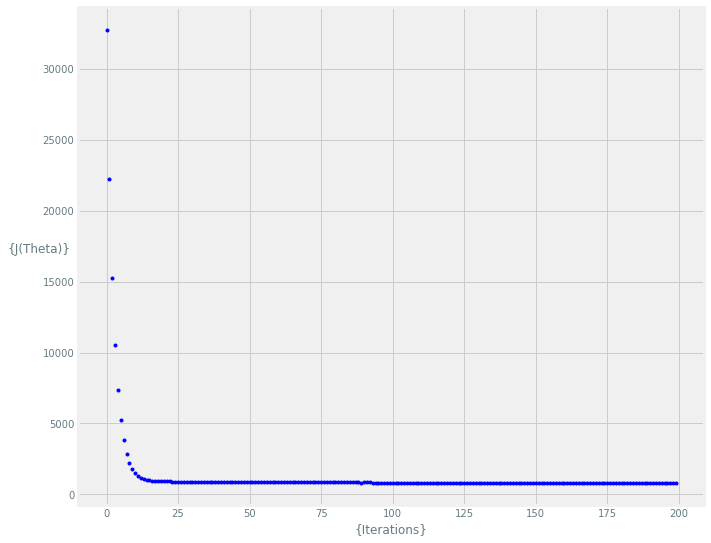

In [94]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')